In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [166]:
train_df = pd.read_csv('train.csv')

In [211]:
train_df.shape

(1460, 80)

In [167]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [168]:
train_df.drop(columns=['Id'], inplace=True)

In [169]:
train_df['Condition1'].isnull().sum()

np.int64(0)

<Axes: >

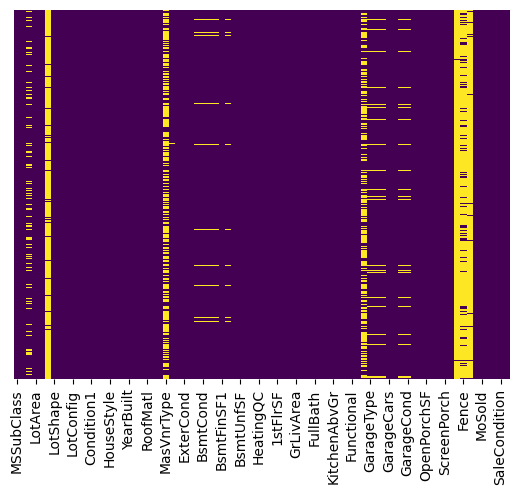

In [146]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [141]:
train_df['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [157]:
categorical_columns = train_transformed_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = train_transformed_df.select_dtypes(include=np.number).columns.tolist()

print("Categorical columns:")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

Categorical columns:
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [158]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = train_df.select_dtypes(include=np.number).columns.tolist()

print("Categorical columns:")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

Categorical columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numerical columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageAr

In [159]:
# Review the list of categorical columns:
# ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Based on domain knowledge and potential cardinality, select columns for one-hot encoding.
# Nominal features are good candidates for one-hot encoding.
# Features with very high cardinality might not be suitable for one-hot encoding directly.

one_hot_columns = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

print("Columns selected for one-hot encoding:")
print(one_hot_columns)

Columns selected for one-hot encoding:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [160]:
# Review the list of categorical columns:
# ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Identify ordinal columns based on domain knowledge.
ordinal_columns = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
    'Fence'
]

print("Columns selected for ordinal encoding:")
print(ordinal_columns)

Columns selected for ordinal encoding:
['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']


In [161]:
column_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_columns),
    ('ordinal_encoding', OrdinalEncoder(), ordinal_columns)
], remainder='passthrough')

In [162]:
train_encoded = column_transformer.fit_transform(train_transformed_df)

In [163]:
one_hot_feature_names = column_transformer.named_transformers_['one_hot_encoding'].get_feature_names_out(one_hot_columns)
ordinal_feature_names = ordinal_columns
passthrough_columns = [col for col in train_transformed_df.columns if col not in one_hot_columns + ordinal_columns]
all_feature_names = np.concatenate([one_hot_feature_names, ordinal_feature_names, passthrough_columns])
train_encoded_df = pd.DataFrame(train_encoded, columns=all_feature_names)
display(train_encoded_df.head())

,MSZoning_0.0,MSZoning_1.0,MSZoning_11.0,MSZoning_14.0,MSZoning_16.0,MSZoning_18.0,MSZoning_22.0,MSZoning_24.0,MSZoning_27.0,MSZoning_28.0,MSZoning_30.0,MSZoning_31.0,MSZoning_32.0,MSZoning_34.0,MSZoning_36.0,MSZoning_38.0,MSZoning_40.0,MSZoning_41.0,MSZoning_42.0,MSZoning_44.0,MSZoning_45.0,MSZoning_46.0,MSZoning_48.0,MSZoning_50.0,MSZoning_51.0,MSZoning_53.0,MSZoning_54.0,MSZoning_56.0,MSZoning_57.0,MSZoning_60.0,MSZoning_63.0,MSZoning_64.0,MSZoning_65.0,MSZoning_66.0,MSZoning_67.0,MSZoning_68.0,MSZoning_70.0,MSZoning_72.0,MSZoning_74.0,MSZoning_75.0,...,GarageCond,PoolQC,Fence,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,65.0,2003.0,missing,missing,missing,missing,Lvl,RL,2Story,5,2003,2003,TA,PConc,706,0,150,856,GasA,Ex,Y,856,0,1,1,1,Gd,2,548,Y,0,61,0,0,2,2008,208500
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,80.0,1976.0,missing,missing,missing,missing,Lvl,RL,1Story,8,1976,1976,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,0,1,TA,2,460,Y,298,0,0,0,5,2007,181500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,68.0,2001.0,missing,missing,missing,missing,Lvl,RL,2Story,5,2001,2002,TA,PConc,486,0,434,920,GasA,Ex,Y,920,0,1,1,1,Gd,2,608,Y,0,42,0,0,9,2008,223500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,60.0,1998.0,missing,missing,missing,missing,Lvl,RL,2Story,5,1915,1970,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,0,1,0,1,Gd,3,642,Y,0,35,272,0,2,2006,140000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,84.0,2000.0,missing,missing,missing,missing,Lvl,RL,2Story,5,2000,2000,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,0,1,1,1,Gd,3,836,Y,192,84,0,0,12,2008,250000


In [164]:
print("Missing values after encoding:")
print(train_encoded_df.isnull().sum().sum())

Missing values after encoding:
0


In [165]:
display(train_encoded_df.head())
print(train_encoded_df.info())
print(train_encoded_df.columns)

,MSZoning_0.0,MSZoning_1.0,MSZoning_11.0,MSZoning_14.0,MSZoning_16.0,MSZoning_18.0,MSZoning_22.0,MSZoning_24.0,MSZoning_27.0,MSZoning_28.0,MSZoning_30.0,MSZoning_31.0,MSZoning_32.0,MSZoning_34.0,MSZoning_36.0,MSZoning_38.0,MSZoning_40.0,MSZoning_41.0,MSZoning_42.0,MSZoning_44.0,MSZoning_45.0,MSZoning_46.0,MSZoning_48.0,MSZoning_50.0,MSZoning_51.0,MSZoning_53.0,MSZoning_54.0,MSZoning_56.0,MSZoning_57.0,MSZoning_60.0,MSZoning_63.0,MSZoning_64.0,MSZoning_65.0,MSZoning_66.0,MSZoning_67.0,MSZoning_68.0,MSZoning_70.0,MSZoning_72.0,MSZoning_74.0,MSZoning_75.0,...,GarageCond,PoolQC,Fence,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,65.0,2003.0,missing,missing,missing,missing,Lvl,RL,2Story,5,2003,2003,TA,PConc,706,0,150,856,GasA,Ex,Y,856,0,1,1,1,Gd,2,548,Y,0,61,0,0,2,2008,208500
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,80.0,1976.0,missing,missing,missing,missing,Lvl,RL,1Story,8,1976,1976,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,0,1,TA,2,460,Y,298,0,0,0,5,2007,181500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,68.0,2001.0,missing,missing,missing,missing,Lvl,RL,2Story,5,2001,2002,TA,PConc,486,0,434,920,GasA,Ex,Y,920,0,1,1,1,Gd,2,608,Y,0,42,0,0,9,2008,223500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,60.0,1998.0,missing,missing,missing,missing,Lvl,RL,2Story,5,1915,1970,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,0,1,0,1,Gd,3,642,Y,0,35,272,0,2,2006,140000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,84.0,2000.0,missing,missing,missing,missing,Lvl,RL,2Story,5,2000,2000,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,0,1,1,1,Gd,3,836,Y,192,84,0,0,12,2008,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 1428 entries, MSZoning_0.0 to SalePrice
dtypes: object(1428)
memory usage: 15.9+ MB
None
Index(['MSZoning_0.0', 'MSZoning_1.0', 'MSZoning_11.0', 'MSZoning_14.0',
       'MSZoning_16.0', 'MSZoning_18.0', 'MSZoning_22.0', 'MSZoning_24.0',
       'MSZoning_27.0', 'MSZoning_28.0',
       ...
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object', length=1428)


In [170]:
null_counts = train_df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("Columns with null values in train_df:")
print(columns_with_nulls)

Columns with null values in train_df:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [171]:
columns_with_nulls_list = columns_with_nulls.index.tolist()
print("List of columns with null values:")
print(columns_with_nulls_list)

List of columns with null values:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [172]:
print(columns_with_nulls)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [173]:
imputation_transformers = []

# Numerical columns with missing values and their preferred imputation strategy
numerical_impute_median = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Categorical columns with missing values and their preferred imputation strategy
categorical_impute_constant = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                              'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
                              'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                              'Fence', 'MiscFeature']
categorical_impute_most_frequent = ['Electrical']

for col in numerical_impute_median:
    imputation_transformers.append((f'impute_{col}', SimpleImputer(strategy='median'), col))

for col in categorical_impute_constant:
    imputation_transformers.append((f'impute_{col}', SimpleImputer(strategy='constant', fill_value='missing'), col))

for col in categorical_impute_most_frequent:
    imputation_transformers.append((f'impute_{col}', SimpleImputer(strategy='most_frequent'), col))

# Add other existing transformers from the original trf1 if needed, or reconstruct based on the task.
# Since the task is to create a CT for imputation only, we'll include only the imputation steps.
# The original trf1 also included imputation for 'LandContour', 'Utilities', 'ExterQual', 'LandSlope', 'Neighborhood'
# Let's check if these columns had missing values based on the 'columns_with_nulls' output.
# 'LandContour', 'Utilities', 'ExterQual', 'LandSlope', 'Neighborhood' do not have missing values.
# So, we only need to include imputation for the columns identified in columns_with_nulls.

trf1 = ColumnTransformer(imputation_transformers, remainder='passthrough')

In [191]:
train_imputed_data = trf1.fit_transform(train_df)

In [192]:
imputation_transformers = []

# Numerical columns with missing values and their preferred imputation strategy
numerical_impute_median = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Categorical columns with missing values and their preferred imputation strategy
categorical_impute_constant = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                              'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
                              'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                              'Fence', 'MiscFeature']
categorical_impute_most_frequent = ['Electrical']

for col in numerical_impute_median:
    imputation_transformers.append((f'impute_{col}', SimpleImputer(strategy='median'), [col]))

for col in categorical_impute_constant:
    imputation_transformers.append((f'impute_{col}', SimpleImputer(strategy='constant', fill_value='missing'), [col]))

for col in categorical_impute_most_frequent:
    imputation_transformers.append((f'impute_{col}', SimpleImputer(strategy='most_frequent'), [col]))

trf1 = ColumnTransformer(imputation_transformers, remainder='passthrough')

train_imputed_data = trf1.fit_transform(train_df)

In [193]:
train_imputed_df = pd.DataFrame(train_imputed_data, columns=trf1.get_feature_names_out(train_df.columns))
display(train_imputed_df.head())

,impute_LotFrontage__LotFrontage,impute_MasVnrArea__MasVnrArea,impute_GarageYrBlt__GarageYrBlt,impute_Alley__Alley,impute_MasVnrType__MasVnrType,impute_BsmtQual__BsmtQual,impute_BsmtCond__BsmtCond,impute_BsmtExposure__BsmtExposure,impute_BsmtFinType1__BsmtFinType1,impute_BsmtFinType2__BsmtFinType2,impute_FireplaceQu__FireplaceQu,impute_GarageType__GarageType,impute_GarageFinish__GarageFinish,impute_GarageQual__GarageQual,impute_GarageCond__GarageCond,impute_PoolQC__PoolQC,impute_Fence__Fence,impute_MiscFeature__MiscFeature,impute_Electrical__Electrical,remainder__MSSubClass,remainder__MSZoning,remainder__LotArea,remainder__Street,remainder__LotShape,remainder__LandContour,remainder__Utilities,remainder__LotConfig,remainder__LandSlope,remainder__Neighborhood,remainder__Condition1,remainder__Condition2,remainder__BldgType,remainder__HouseStyle,remainder__OverallQual,remainder__OverallCond,remainder__YearBuilt,remainder__YearRemodAdd,remainder__RoofStyle,remainder__RoofMatl,remainder__Exterior1st,remainder__Exterior2nd,remainder__ExterQual,remainder__ExterCond,remainder__Foundation,remainder__BsmtFinSF1,remainder__BsmtFinSF2,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__Heating,remainder__HeatingQC,remainder__CentralAir,remainder__1stFlrSF,remainder__2ndFlrSF,remainder__LowQualFinSF,remainder__GrLivArea,remainder__BsmtFullBath,remainder__BsmtHalfBath,remainder__FullBath,remainder__HalfBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__KitchenQual,remainder__TotRmsAbvGrd,remainder__Functional,remainder__Fireplaces,remainder__GarageCars,remainder__GarageArea,remainder__PavedDrive,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SaleType,remainder__SaleCondition,remainder__SalePrice
0,65.0,196.0,2003.0,missing,BrkFace,Gd,TA,No,GLQ,Unf,missing,Attchd,RFn,TA,TA,missing,missing,missing,SBrkr,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,80.0,0.0,1976.0,missing,missing,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,missing,missing,missing,SBrkr,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,68.0,162.0,2001.0,missing,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,missing,missing,missing,SBrkr,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,60.0,0.0,1998.0,missing,missing,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,missing,missing,missing,SBrkr,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,84.0,350.0,2000.0,missing,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,missing,missing,missing,SBrkr,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [194]:
print("Missing values after imputation:")
print(train_imputed_df.isnull().sum().sum())

Missing values after imputation:
0


In [195]:
categorical_columns_imputed = train_imputed_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns_imputed = train_imputed_df.select_dtypes(include=np.number).columns.tolist()

print("Categorical columns in train_imputed_df:")
print(categorical_columns_imputed)
print("\nNumerical columns in train_imputed_df:")
print(numerical_columns_imputed)

Categorical columns in train_imputed_df:
['impute_LotFrontage__LotFrontage', 'impute_MasVnrArea__MasVnrArea', 'impute_GarageYrBlt__GarageYrBlt', 'impute_Alley__Alley', 'impute_MasVnrType__MasVnrType', 'impute_BsmtQual__BsmtQual', 'impute_BsmtCond__BsmtCond', 'impute_BsmtExposure__BsmtExposure', 'impute_BsmtFinType1__BsmtFinType1', 'impute_BsmtFinType2__BsmtFinType2', 'impute_FireplaceQu__FireplaceQu', 'impute_GarageType__GarageType', 'impute_GarageFinish__GarageFinish', 'impute_GarageQual__GarageQual', 'impute_GarageCond__GarageCond', 'impute_PoolQC__PoolQC', 'impute_Fence__Fence', 'impute_MiscFeature__MiscFeature', 'impute_Electrical__Electrical', 'remainder__MSSubClass', 'remainder__MSZoning', 'remainder__LotArea', 'remainder__Street', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remai

In [196]:
# Correctly identify categorical and numerical columns based on the original train_df dtypes
categorical_columns_original = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns_original = train_df.select_dtypes(include=np.number).columns.tolist()

# The transformed DataFrame columns are named using the transformer names and original column names.
# We need to map the original column names to the new column names in train_imputed_df.
# The get_feature_names_out() method of the transformer gives us this mapping.

# Get the feature names from the transformer.
transformed_feature_names = trf1.get_feature_names_out(train_df.columns)

# Create lists for categorical and numerical columns in the imputed DataFrame
categorical_columns_imputed_corrected = []
numerical_columns_imputed_corrected = []

# Iterate through the original categorical and numerical columns and find their corresponding names in the transformed DataFrame
for original_col in categorical_columns_original:
    for transformed_col in transformed_feature_names:
        if original_col in transformed_col:
            categorical_columns_imputed_corrected.append(transformed_col)
            break # Assuming each original column maps to one transformed column or a set of OHE columns later

for original_col in numerical_columns_original:
     for transformed_col in transformed_feature_names:
        if original_col in transformed_col:
            # Check if the transformed column is indeed numerical in the imputed dataframe
            if train_imputed_df[transformed_col].dtype in [np.int64, np.float64]:
                numerical_columns_imputed_corrected.append(transformed_col)
            break

print("Corrected Categorical columns in train_imputed_df:")
print(categorical_columns_imputed_corrected)
print("\nCorrected Numerical columns in train_imputed_df:")
print(numerical_columns_imputed_corrected)

Corrected Categorical columns in train_imputed_df:
['remainder__MSZoning', 'remainder__Street', 'impute_Alley__Alley', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remainder__RoofStyle', 'remainder__RoofMatl', 'remainder__Exterior1st', 'remainder__Exterior2nd', 'impute_MasVnrType__MasVnrType', 'remainder__ExterQual', 'remainder__ExterCond', 'remainder__Foundation', 'impute_BsmtQual__BsmtQual', 'impute_BsmtCond__BsmtCond', 'impute_BsmtExposure__BsmtExposure', 'impute_BsmtFinType1__BsmtFinType1', 'impute_BsmtFinType2__BsmtFinType2', 'remainder__Heating', 'remainder__HeatingQC', 'remainder__CentralAir', 'impute_Electrical__Electrical', 'remainder__KitchenQual', 'remainder__Functional', 'impute_FireplaceQu__FireplaceQu', 'impute_GarageType__GarageType', 'impute_GarageFinish__GarageFinish', '

In [197]:
# Re-identify categorical and numerical columns based on the original train_df dtypes
categorical_columns_original = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns_original = train_df.select_dtypes(include=np.number).columns.tolist()

# Get the feature names from the transformer.
transformed_feature_names = trf1.get_feature_names_out(train_df.columns)

# Create lists for categorical and numerical columns in the imputed DataFrame
categorical_columns_imputed_corrected = []
numerical_columns_imputed_corrected = []

# Map original categorical column names to their transformed names
for original_col in categorical_columns_original:
    for transformed_col in transformed_feature_names:
        if original_col in transformed_col and transformed_col.startswith(('impute_', 'remainder__')):
            categorical_columns_imputed_corrected.append(transformed_col)
            break

# Map original numerical column names to their transformed names
for original_col in numerical_columns_original:
     for transformed_col in transformed_feature_names:
        if original_col in transformed_col and transformed_col.startswith(('impute_', 'remainder__')):
             numerical_columns_imputed_corrected.append(transformed_col)
             break


print("Corrected Categorical columns in train_imputed_df based on original dtypes:")
print(categorical_columns_imputed_corrected)
print("\nCorrected Numerical columns in train_imputed_df based on original dtypes:")
print(numerical_columns_imputed_corrected)

Corrected Categorical columns in train_imputed_df based on original dtypes:
['remainder__MSZoning', 'remainder__Street', 'impute_Alley__Alley', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remainder__RoofStyle', 'remainder__RoofMatl', 'remainder__Exterior1st', 'remainder__Exterior2nd', 'impute_MasVnrType__MasVnrType', 'remainder__ExterQual', 'remainder__ExterCond', 'remainder__Foundation', 'impute_BsmtQual__BsmtQual', 'impute_BsmtCond__BsmtCond', 'impute_BsmtExposure__BsmtExposure', 'impute_BsmtFinType1__BsmtFinType1', 'impute_BsmtFinType2__BsmtFinType2', 'remainder__Heating', 'remainder__HeatingQC', 'remainder__CentralAir', 'impute_Electrical__Electrical', 'remainder__KitchenQual', 'remainder__Functional', 'impute_FireplaceQu__FireplaceQu', 'impute_GarageType__GarageType', 'impute_Garag

In [198]:
# Review the corrected list of categorical columns in train_imputed_df:
# ['impute_Alley', 'impute_MasVnrType', 'impute_BsmtQual', 'impute_BsmtCond', 'impute_BsmtExposure', 'impute_BsmtFinType1', 'impute_BsmtFinType2', 'impute_Electrical', 'impute_FireplaceQu', 'impute_GarageType', 'impute_GarageFinish', 'impute_GarageQual', 'impute_GarageCond', 'impute_PoolQC', 'impute_Fence', 'impute_MiscFeature', 'remainder__MSZoning', 'remainder__Street', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remainder__RoofStyle', 'remainder__RoofMatl', 'remainder__Exterior1st', 'remainder__Exterior2nd', 'remainder__ExterQual', 'remainder__ExterCond', 'remainder__Foundation', 'remainder__Heating', 'remainder__HeatingQC', 'remainder__CentralAir', 'remainder__KitchenQual', 'remainder__Functional', 'remainder__PavedDrive', 'remainder__SaleType', 'remainder__SaleCondition']

# Based on domain knowledge and potential cardinality, select columns for one-hot encoding.
# Nominal features are good candidates for one-hot encoding.
# Features with very high cardinality might not be suitable for one-hot encoding directly.

one_hot_columns_imputed = [
    'impute_Alley',
    'impute_MasVnrType',
    'impute_Electrical',
    'impute_GarageType',
    'impute_MiscFeature',
    'remainder__MSZoning',
    'remainder__Street',
    'remainder__LotShape',
    'remainder__LandContour',
    'remainder__Utilities',
    'remainder__LotConfig',
    'remainder__LandSlope',
    'remainder__Neighborhood', # While Neighborhood has many categories, it's often treated as nominal.
    'remainder__Condition1',
    'remainder__Condition2',
    'remainder__BldgType',
    'remainder__HouseStyle',
    'remainder__RoofStyle',
    'remainder__RoofMatl',
    'remainder__Exterior1st',
    'remainder__Exterior2nd',
    'remainder__Foundation',
    'remainder__Heating',
    'remainder__CentralAir',
    'remainder__Functional',
    'remainder__PavedDrive',
    'remainder__SaleType',
    'remainder__SaleCondition'
]

print("Columns selected for one-hot encoding in the imputed DataFrame:")
print(one_hot_columns_imputed)

Columns selected for one-hot encoding in the imputed DataFrame:
['impute_Alley', 'impute_MasVnrType', 'impute_Electrical', 'impute_GarageType', 'impute_MiscFeature', 'remainder__MSZoning', 'remainder__Street', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remainder__RoofStyle', 'remainder__RoofMatl', 'remainder__Exterior1st', 'remainder__Exterior2nd', 'remainder__Foundation', 'remainder__Heating', 'remainder__CentralAir', 'remainder__Functional', 'remainder__PavedDrive', 'remainder__SaleType', 'remainder__SaleCondition']


In [199]:
# Review the corrected list of categorical columns in train_imputed_df:
# ['impute_Alley', 'impute_MasVnrType', 'impute_BsmtQual', 'impute_BsmtCond', 'impute_BsmtExposure', 'impute_BsmtFinType1', 'impute_BsmtFinType2', 'impute_Electrical', 'impute_FireplaceQu', 'impute_GarageType', 'impute_GarageFinish', 'impute_GarageQual', 'impute_GarageCond', 'impute_PoolQC', 'impute_Fence', 'impute_MiscFeature', 'remainder__MSZoning', 'remainder__Street', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remainder__RoofStyle', 'remainder__RoofMatl', 'remainder__Exterior1st', 'remainder__Exterior2nd', 'remainder__ExterQual', 'remainder__ExterCond', 'remainder__Foundation', 'remainder__Heating', 'remainder__HeatingQC', 'remainder__CentralAir', 'remainder__KitchenQual', 'remainder__Functional', 'remainder__PavedDrive', 'remainder__SaleType', 'remainder__SaleCondition']

# Identify ordinal columns from the remaining categorical columns based on domain knowledge.
ordinal_columns_imputed = [col for col in categorical_columns_imputed_corrected if col not in one_hot_columns_imputed]

print("Columns selected for ordinal encoding in the imputed DataFrame:")
print(ordinal_columns_imputed)

Columns selected for ordinal encoding in the imputed DataFrame:
['impute_Alley__Alley', 'impute_MasVnrType__MasVnrType', 'remainder__ExterQual', 'remainder__ExterCond', 'impute_BsmtQual__BsmtQual', 'impute_BsmtCond__BsmtCond', 'impute_BsmtExposure__BsmtExposure', 'impute_BsmtFinType1__BsmtFinType1', 'impute_BsmtFinType2__BsmtFinType2', 'remainder__HeatingQC', 'impute_Electrical__Electrical', 'remainder__KitchenQual', 'impute_FireplaceQu__FireplaceQu', 'impute_GarageType__GarageType', 'impute_GarageFinish__GarageFinish', 'impute_GarageQual__GarageQual', 'impute_GarageCond__GarageCond', 'impute_PoolQC__PoolQC', 'impute_Fence__Fence', 'impute_MiscFeature__MiscFeature']


In [200]:
# Review the corrected list of categorical columns in train_imputed_df:
# ['impute_Alley', 'impute_MasVnrType', 'impute_BsmtQual', 'impute_BsmtCond', 'impute_BsmtExposure', 'impute_BsmtFinType1', 'impute_BsmtFinType2', 'impute_Electrical', 'impute_FireplaceQu', 'impute_GarageType', 'impute_GarageFinish', 'impute_GarageQual', 'impute_GarageCond', 'impute_PoolQC', 'impute_Fence', 'impute_MiscFeature', 'remainder__MSZoning', 'remainder__Street', 'remainder__LotShape', 'remainder__LandContour', 'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope', 'remainder__Neighborhood', 'remainder__Condition1', 'remainder__Condition2', 'remainder__BldgType', 'remainder__HouseStyle', 'remainder__RoofStyle', 'remainder__RoofMatl', 'remainder__Exterior1st', 'remainder__Exterior2nd', 'remainder__ExterQual', 'remainder__ExterCond', 'remainder__Foundation', 'remainder__Heating', 'remainder__HeatingQC', 'remainder__CentralAir', 'remainder__KitchenQual', 'remainder__Functional', 'remainder__PavedDrive', 'remainder__SaleType', 'remainder__SaleCondition']

# Identify ordinal columns from the remaining categorical columns based on domain knowledge.
# These are columns with inherent order or ranking.
ordinal_columns_imputed = [
    'impute_BsmtQual',
    'impute_BsmtCond',
    'impute_BsmtExposure',
    'impute_BsmtFinType1',
    'impute_BsmtFinType2',
    'impute_FireplaceQu',
    'impute_GarageFinish',
    'impute_GarageQual',
    'impute_GarageCond',
    'impute_PoolQC', # PoolQC has a ranking of quality
    'impute_Fence', # Fence has a ranking of privacy/type
    'remainder__ExterQual',
    'remainder__ExterCond',
    'remainder__HeatingQC',
    'remainder__KitchenQual'
]

print("Columns selected for ordinal encoding in the imputed DataFrame:")
print(ordinal_columns_imputed)

Columns selected for ordinal encoding in the imputed DataFrame:
['impute_BsmtQual', 'impute_BsmtCond', 'impute_BsmtExposure', 'impute_BsmtFinType1', 'impute_BsmtFinType2', 'impute_FireplaceQu', 'impute_GarageFinish', 'impute_GarageQual', 'impute_GarageCond', 'impute_PoolQC', 'impute_Fence', 'remainder__ExterQual', 'remainder__ExterCond', 'remainder__HeatingQC', 'remainder__KitchenQual']


In [201]:
encoding_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_columns_imputed),
    ('ordinal_encoding', OrdinalEncoder(), ordinal_columns_imputed)
], remainder='passthrough')

In [213]:
train_encoded_data = encoding_transformer.fit_transform(train_imputed_df)

In [214]:
print(train_imputed_df.columns)

Index(['impute_LotFrontage__LotFrontage', 'impute_MasVnrArea__MasVnrArea',
       'impute_GarageYrBlt__GarageYrBlt', 'impute_Alley__Alley',
       'impute_MasVnrType__MasVnrType', 'impute_BsmtQual__BsmtQual',
       'impute_BsmtCond__BsmtCond', 'impute_BsmtExposure__BsmtExposure',
       'impute_BsmtFinType1__BsmtFinType1',
       'impute_BsmtFinType2__BsmtFinType2', 'impute_FireplaceQu__FireplaceQu',
       'impute_GarageType__GarageType', 'impute_GarageFinish__GarageFinish',
       'impute_GarageQual__GarageQual', 'impute_GarageCond__GarageCond',
       'impute_PoolQC__PoolQC', 'impute_Fence__Fence',
       'impute_MiscFeature__MiscFeature', 'impute_Electrical__Electrical',
       'remainder__MSSubClass', 'remainder__MSZoning', 'remainder__LotArea',
       'remainder__Street', 'remainder__LotShape', 'remainder__LandContour',
       'remainder__Utilities', 'remainder__LotConfig', 'remainder__LandSlope',
       'remainder__Neighborhood', 'remainder__Condition1',
       'remainder__Cond

In [215]:
one_hot_columns_imputed_updated = [
    'impute_Alley__Alley',
    'impute_MasVnrType__MasVnrType',
    'impute_Electrical__Electrical',
    'impute_GarageType__GarageType',
    'impute_MiscFeature__MiscFeature',
    'remainder__MSZoning',
    'remainder__Street',
    'remainder__LotShape',
    'remainder__LandContour',
    'remainder__Utilities',
    'remainder__LotConfig',
    'remainder__LandSlope',
    'remainder__Neighborhood',
    'remainder__Condition1',
    'remainder__Condition2',
    'remainder__BldgType',
    'remainder__HouseStyle',
    'remainder__RoofStyle',
    'remainder__RoofMatl',
    'remainder__Exterior1st',
    'remainder__Exterior2nd',
    'remainder__Foundation',
    'remainder__Heating',
    'remainder__CentralAir',
    'remainder__Functional',
    'remainder__PavedDrive',
    'remainder__SaleType',
    'remainder__SaleCondition'
]

ordinal_columns_imputed_updated = [
    'impute_BsmtQual__BsmtQual',
    'impute_BsmtCond__BsmtCond',
    'impute_BsmtExposure__BsmtExposure',
    'impute_BsmtFinType1__BsmtFinType1',
    'impute_BsmtFinType2__BsmtFinType2',
    'impute_FireplaceQu__FireplaceQu',
    'impute_GarageFinish__GarageFinish',
    'impute_GarageQual__GarageQual',
    'impute_GarageCond__GarageCond',
    'impute_PoolQC__PoolQC',
    'impute_Fence__Fence',
    'remainder__ExterQual',
    'remainder__ExterCond',
    'remainder__HeatingQC',
    'remainder__KitchenQual'
]

encoding_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_columns_imputed_updated),
    ('ordinal_encoding', OrdinalEncoder(), ordinal_columns_imputed_updated)
], remainder='passthrough')

train_encoded_data = encoding_transformer.fit_transform(train_imputed_df)

In [216]:
one_hot_feature_names_out = encoding_transformer.named_transformers_['one_hot_encoding'].get_feature_names_out(one_hot_columns_imputed_updated)
ordinal_feature_names_out = ordinal_columns_imputed_updated
passthrough_columns_out = [col for col in train_imputed_df.columns if col not in one_hot_columns_imputed_updated + ordinal_columns_imputed_updated]
all_feature_names_out = np.concatenate([one_hot_feature_names_out, ordinal_feature_names_out, passthrough_columns_out])
train_encoded_df = pd.DataFrame(train_encoded_data, columns=all_feature_names_out)
display(train_encoded_df.head())

,impute_Alley__Alley_Grvl,impute_Alley__Alley_Pave,impute_Alley__Alley_missing,impute_MasVnrType__MasVnrType_BrkCmn,impute_MasVnrType__MasVnrType_BrkFace,impute_MasVnrType__MasVnrType_Stone,impute_MasVnrType__MasVnrType_missing,impute_Electrical__Electrical_FuseA,impute_Electrical__Electrical_FuseF,impute_Electrical__Electrical_FuseP,impute_Electrical__Electrical_Mix,impute_Electrical__Electrical_SBrkr,impute_GarageType__GarageType_2Types,impute_GarageType__GarageType_Attchd,impute_GarageType__GarageType_Basment,impute_GarageType__GarageType_BuiltIn,impute_GarageType__GarageType_CarPort,impute_GarageType__GarageType_Detchd,impute_GarageType__GarageType_missing,impute_MiscFeature__MiscFeature_Gar2,impute_MiscFeature__MiscFeature_Othr,impute_MiscFeature__MiscFeature_Shed,impute_MiscFeature__MiscFeature_TenC,impute_MiscFeature__MiscFeature_missing,remainder__MSZoning_C (all),remainder__MSZoning_FV,remainder__MSZoning_RH,remainder__MSZoning_RL,remainder__MSZoning_RM,remainder__Street_Grvl,remainder__Street_Pave,remainder__LotShape_IR1,remainder__LotShape_IR2,remainder__LotShape_IR3,remainder__LotShape_Reg,remainder__LandContour_Bnk,remainder__LandContour_HLS,remainder__LandContour_Low,remainder__LandContour_Lvl,remainder__Utilities_AllPub,...,remainder__ExterCond,remainder__HeatingQC,remainder__KitchenQual,impute_LotFrontage__LotFrontage,impute_MasVnrArea__MasVnrArea,impute_GarageYrBlt__GarageYrBlt,remainder__MSSubClass,remainder__LotArea,remainder__OverallQual,remainder__OverallCond,remainder__YearBuilt,remainder__YearRemodAdd,remainder__BsmtFinSF1,remainder__BsmtFinSF2,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__2ndFlrSF,remainder__LowQualFinSF,remainder__GrLivArea,remainder__BsmtFullBath,remainder__BsmtHalfBath,remainder__FullBath,remainder__HalfBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__TotRmsAbvGrd,remainder__Fireplaces,remainder__GarageCars,remainder__GarageArea,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,3.0,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,2.0,2.0,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [217]:
display(train_encoded_df.head())
print(train_encoded_df.info())
missing_values_count = train_encoded_df.isnull().sum().sum()
print(f"\nTotal number of missing values in train_encoded_df: {missing_values_count}")

,impute_Alley__Alley_Grvl,impute_Alley__Alley_Pave,impute_Alley__Alley_missing,impute_MasVnrType__MasVnrType_BrkCmn,impute_MasVnrType__MasVnrType_BrkFace,impute_MasVnrType__MasVnrType_Stone,impute_MasVnrType__MasVnrType_missing,impute_Electrical__Electrical_FuseA,impute_Electrical__Electrical_FuseF,impute_Electrical__Electrical_FuseP,impute_Electrical__Electrical_Mix,impute_Electrical__Electrical_SBrkr,impute_GarageType__GarageType_2Types,impute_GarageType__GarageType_Attchd,impute_GarageType__GarageType_Basment,impute_GarageType__GarageType_BuiltIn,impute_GarageType__GarageType_CarPort,impute_GarageType__GarageType_Detchd,impute_GarageType__GarageType_missing,impute_MiscFeature__MiscFeature_Gar2,impute_MiscFeature__MiscFeature_Othr,impute_MiscFeature__MiscFeature_Shed,impute_MiscFeature__MiscFeature_TenC,impute_MiscFeature__MiscFeature_missing,remainder__MSZoning_C (all),remainder__MSZoning_FV,remainder__MSZoning_RH,remainder__MSZoning_RL,remainder__MSZoning_RM,remainder__Street_Grvl,remainder__Street_Pave,remainder__LotShape_IR1,remainder__LotShape_IR2,remainder__LotShape_IR3,remainder__LotShape_Reg,remainder__LandContour_Bnk,remainder__LandContour_HLS,remainder__LandContour_Low,remainder__LandContour_Lvl,remainder__Utilities_AllPub,...,remainder__ExterCond,remainder__HeatingQC,remainder__KitchenQual,impute_LotFrontage__LotFrontage,impute_MasVnrArea__MasVnrArea,impute_GarageYrBlt__GarageYrBlt,remainder__MSSubClass,remainder__LotArea,remainder__OverallQual,remainder__OverallCond,remainder__YearBuilt,remainder__YearRemodAdd,remainder__BsmtFinSF1,remainder__BsmtFinSF2,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__2ndFlrSF,remainder__LowQualFinSF,remainder__GrLivArea,remainder__BsmtFullBath,remainder__BsmtHalfBath,remainder__FullBath,remainder__HalfBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__TotRmsAbvGrd,remainder__Fireplaces,remainder__GarageCars,remainder__GarageArea,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,3.0,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,2.0,2.0,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, impute_Alley__Alley_Grvl to remainder__SalePrice
dtypes: object(240)
memory usage: 2.7+ MB
None

Total number of missing values in train_encoded_df: 0


In [218]:
train_encoded_df.shape

(1460, 240)

In [207]:
display(train_encoded_df.head())
print(train_encoded_df.info())

,impute_Alley__Alley_Grvl,impute_Alley__Alley_Pave,impute_Alley__Alley_missing,impute_MasVnrType__MasVnrType_BrkCmn,impute_MasVnrType__MasVnrType_BrkFace,impute_MasVnrType__MasVnrType_Stone,impute_MasVnrType__MasVnrType_missing,impute_Electrical__Electrical_FuseA,impute_Electrical__Electrical_FuseF,impute_Electrical__Electrical_FuseP,impute_Electrical__Electrical_Mix,impute_Electrical__Electrical_SBrkr,impute_GarageType__GarageType_2Types,impute_GarageType__GarageType_Attchd,impute_GarageType__GarageType_Basment,impute_GarageType__GarageType_BuiltIn,impute_GarageType__GarageType_CarPort,impute_GarageType__GarageType_Detchd,impute_GarageType__GarageType_missing,impute_MiscFeature__MiscFeature_Gar2,impute_MiscFeature__MiscFeature_Othr,impute_MiscFeature__MiscFeature_Shed,impute_MiscFeature__MiscFeature_TenC,impute_MiscFeature__MiscFeature_missing,remainder__MSZoning_C (all),remainder__MSZoning_FV,remainder__MSZoning_RH,remainder__MSZoning_RL,remainder__MSZoning_RM,remainder__Street_Grvl,remainder__Street_Pave,remainder__LotShape_IR1,remainder__LotShape_IR2,remainder__LotShape_IR3,remainder__LotShape_Reg,remainder__LandContour_Bnk,remainder__LandContour_HLS,remainder__LandContour_Low,remainder__LandContour_Lvl,remainder__Utilities_AllPub,...,remainder__ExterCond,remainder__HeatingQC,remainder__KitchenQual,impute_LotFrontage__LotFrontage,impute_MasVnrArea__MasVnrArea,impute_GarageYrBlt__GarageYrBlt,remainder__MSSubClass,remainder__LotArea,remainder__OverallQual,remainder__OverallCond,remainder__YearBuilt,remainder__YearRemodAdd,remainder__BsmtFinSF1,remainder__BsmtFinSF2,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__2ndFlrSF,remainder__LowQualFinSF,remainder__GrLivArea,remainder__BsmtFullBath,remainder__BsmtHalfBath,remainder__FullBath,remainder__HalfBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__TotRmsAbvGrd,remainder__Fireplaces,remainder__GarageCars,remainder__GarageArea,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,3.0,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,2.0,2.0,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, impute_Alley__Alley_Grvl to remainder__SalePrice
dtypes: object(240)
memory usage: 2.7+ MB
None


In [210]:
# Based on the previous steps, we know the original numerical columns
# and their transformed names in train_imputed_df, which are passed through
# to train_encoded_df with the same names (prefixed with 'remainder__').
# The imputed numerical columns also retain their numerical nature.

numerical_columns_to_scale = [
    col for col in train_encoded_df.columns
    if col in numerical_columns_imputed_corrected and col != 'remainder__SalePrice'
]

print("Numerical columns in train_encoded_df suitable for scaling:")
print(numerical_columns_to_scale)

Numerical columns in train_encoded_df suitable for scaling:
['impute_LotFrontage__LotFrontage', 'impute_MasVnrArea__MasVnrArea', 'impute_GarageYrBlt__GarageYrBlt', 'remainder__MSSubClass', 'remainder__LotArea', 'remainder__OverallQual', 'remainder__OverallCond', 'remainder__YearBuilt', 'remainder__YearRemodAdd', 'remainder__BsmtFinSF1', 'remainder__BsmtFinSF2', 'remainder__BsmtUnfSF', 'remainder__TotalBsmtSF', 'remainder__1stFlrSF', 'remainder__2ndFlrSF', 'remainder__LowQualFinSF', 'remainder__GrLivArea', 'remainder__BsmtFullBath', 'remainder__BsmtHalfBath', 'remainder__BedroomAbvGr', 'remainder__KitchenAbvGr', 'remainder__TotRmsAbvGrd', 'remainder__Fireplaces', 'remainder__GarageCars', 'remainder__GarageArea', 'remainder__WoodDeckSF', 'remainder__OpenPorchSF', 'remainder__EnclosedPorch', 'remainder__3SsnPorch', 'remainder__ScreenPorch', 'remainder__PoolArea', 'remainder__MiscVal', 'remainder__MoSold', 'remainder__YrSold']


In [212]:
for col in numerical_columns_to_scale:
    train_encoded_df[col] = train_encoded_df[col].astype(float)

print("Data types after converting numerical columns:")
train_encoded_df.info()

Data types after converting numerical columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, impute_Alley__Alley_Grvl to remainder__SalePrice
dtypes: float64(34), object(206)
memory usage: 2.7+ MB


In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_encoded_df[numerical_columns_to_scale] = scaler.fit_transform(train_encoded_df[numerical_columns_to_scale])

In [220]:
display(train_encoded_df.head())
print(train_encoded_df.info())
missing_values_count = train_encoded_df.isnull().sum().sum()
print(f"\nTotal number of missing values in train_encoded_df after scaling: {missing_values_count}")

,impute_Alley__Alley_Grvl,impute_Alley__Alley_Pave,impute_Alley__Alley_missing,impute_MasVnrType__MasVnrType_BrkCmn,impute_MasVnrType__MasVnrType_BrkFace,impute_MasVnrType__MasVnrType_Stone,impute_MasVnrType__MasVnrType_missing,impute_Electrical__Electrical_FuseA,impute_Electrical__Electrical_FuseF,impute_Electrical__Electrical_FuseP,impute_Electrical__Electrical_Mix,impute_Electrical__Electrical_SBrkr,impute_GarageType__GarageType_2Types,impute_GarageType__GarageType_Attchd,impute_GarageType__GarageType_Basment,impute_GarageType__GarageType_BuiltIn,impute_GarageType__GarageType_CarPort,impute_GarageType__GarageType_Detchd,impute_GarageType__GarageType_missing,impute_MiscFeature__MiscFeature_Gar2,impute_MiscFeature__MiscFeature_Othr,impute_MiscFeature__MiscFeature_Shed,impute_MiscFeature__MiscFeature_TenC,impute_MiscFeature__MiscFeature_missing,remainder__MSZoning_C (all),remainder__MSZoning_FV,remainder__MSZoning_RH,remainder__MSZoning_RL,remainder__MSZoning_RM,remainder__Street_Grvl,remainder__Street_Pave,remainder__LotShape_IR1,remainder__LotShape_IR2,remainder__LotShape_IR3,remainder__LotShape_Reg,remainder__LandContour_Bnk,remainder__LandContour_HLS,remainder__LandContour_Low,remainder__LandContour_Lvl,remainder__Utilities_AllPub,...,remainder__ExterCond,remainder__HeatingQC,remainder__KitchenQual,impute_LotFrontage__LotFrontage,impute_MasVnrArea__MasVnrArea,impute_GarageYrBlt__GarageYrBlt,remainder__MSSubClass,remainder__LotArea,remainder__OverallQual,remainder__OverallCond,remainder__YearBuilt,remainder__YearRemodAdd,remainder__BsmtFinSF1,remainder__BsmtFinSF2,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__2ndFlrSF,remainder__LowQualFinSF,remainder__GrLivArea,remainder__BsmtFullBath,remainder__BsmtHalfBath,remainder__FullBath,remainder__HalfBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__TotRmsAbvGrd,remainder__Fireplaces,remainder__GarageCars,remainder__GarageArea,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,-0.220875,0.514104,1.017598,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,2,1,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,3.0,0.460320,-0.570750,-0.107927,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,2,0,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,-0.084636,0.325915,0.934226,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,2,1,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,2.0,2.0,-0.447940,-0.570750,0.809167,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, impute_Alley__Alley_Grvl to remainder__SalePrice
dtypes: float64(34), object(206)
memory usage: 2.7+ MB
None

Total number of missing values in train_encoded_df after scaling: 0


In [221]:
display(train_encoded_df.head())
print(train_encoded_df.info())
missing_values_count = train_encoded_df.isnull().sum().sum()
print(f"\nTotal number of missing values in train_encoded_df: {missing_values_count}")

,impute_Alley__Alley_Grvl,impute_Alley__Alley_Pave,impute_Alley__Alley_missing,impute_MasVnrType__MasVnrType_BrkCmn,impute_MasVnrType__MasVnrType_BrkFace,impute_MasVnrType__MasVnrType_Stone,impute_MasVnrType__MasVnrType_missing,impute_Electrical__Electrical_FuseA,impute_Electrical__Electrical_FuseF,impute_Electrical__Electrical_FuseP,impute_Electrical__Electrical_Mix,impute_Electrical__Electrical_SBrkr,impute_GarageType__GarageType_2Types,impute_GarageType__GarageType_Attchd,impute_GarageType__GarageType_Basment,impute_GarageType__GarageType_BuiltIn,impute_GarageType__GarageType_CarPort,impute_GarageType__GarageType_Detchd,impute_GarageType__GarageType_missing,impute_MiscFeature__MiscFeature_Gar2,impute_MiscFeature__MiscFeature_Othr,impute_MiscFeature__MiscFeature_Shed,impute_MiscFeature__MiscFeature_TenC,impute_MiscFeature__MiscFeature_missing,remainder__MSZoning_C (all),remainder__MSZoning_FV,remainder__MSZoning_RH,remainder__MSZoning_RL,remainder__MSZoning_RM,remainder__Street_Grvl,remainder__Street_Pave,remainder__LotShape_IR1,remainder__LotShape_IR2,remainder__LotShape_IR3,remainder__LotShape_Reg,remainder__LandContour_Bnk,remainder__LandContour_HLS,remainder__LandContour_Low,remainder__LandContour_Lvl,remainder__Utilities_AllPub,...,remainder__ExterCond,remainder__HeatingQC,remainder__KitchenQual,impute_LotFrontage__LotFrontage,impute_MasVnrArea__MasVnrArea,impute_GarageYrBlt__GarageYrBlt,remainder__MSSubClass,remainder__LotArea,remainder__OverallQual,remainder__OverallCond,remainder__YearBuilt,remainder__YearRemodAdd,remainder__BsmtFinSF1,remainder__BsmtFinSF2,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__2ndFlrSF,remainder__LowQualFinSF,remainder__GrLivArea,remainder__BsmtFullBath,remainder__BsmtHalfBath,remainder__FullBath,remainder__HalfBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__TotRmsAbvGrd,remainder__Fireplaces,remainder__GarageCars,remainder__GarageArea,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,-0.220875,0.514104,1.017598,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,2,1,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,3.0,0.460320,-0.570750,-0.107927,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,2,0,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,0.0,2.0,-0.084636,0.325915,0.934226,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,2,1,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,2.0,2.0,-0.447940,-0.570750,0.809167,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, impute_Alley__Alley_Grvl to remainder__SalePrice
dtypes: float64(34), object(206)
memory usage: 2.7+ MB
None

Total number of missing values in train_encoded_df: 0


In [224]:
train_encoded_df.drop(columns=['remainder__SalePrice'], inplace=True)

In [226]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(train_encoded_df, train_df['SalePrice'])

SGDRegressor(max_iter=10000)

In [227]:
y_pred = sgdr.predict(train_encoded_df)

In [243]:
y_pred

array([214190.05592637, 190343.38413897, 212795.43893873, ...,
       245176.89955795, 162636.46458861, 150665.6158178 ])

In [244]:
from sklearn.metrics import mean_squared_error

In [246]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(train_df['SalePrice'], y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Squared Error: 787456266.2429758
Root Mean Squared Error: 28061.651167438024
